# TP 4 - Fisher

## Ejercicio 1

* _Implementar el discriminante lineal de Fisher para 2 clases gaussianas isotrópicas_

In [ ]:
clc;

In [45]:
function dir_opt = fisher(D_1, D_2)
    within = cov(D_1) + cov(D_2);
    dir_opt =(inv(within) * (mean(D_1) - mean(D_2))')';
endfunction

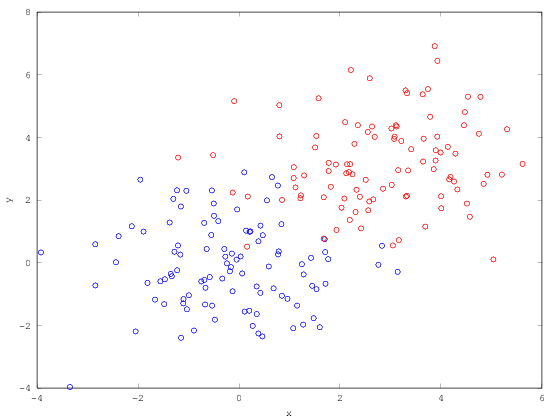

In [20]:
%% MUESTREO
NSAMPLES = 100;

model_mu_1 = [0 0];
model_sigma_1 = eye(2) * 2;
model_mu_2 = [3 3];
model_sigma_2 = model_sigma_1;

D_1 = [];
D_2 = [];
for i = 1:NSAMPLES
  D_1(i,:) = mvnrnd(model_mu_1, model_sigma_1);
  D_2(i,:) = mvnrnd(model_mu_2, model_sigma_2);
end

hold on;
xlabel('x'); ylabel('y');
scatter(D_1(:,1), D_1(:,2), 15, "b");
scatter(D_2(:,1), D_2(:,2), 15, "r");

In [46]:
%% FISHER
dir_opt = fisher(D_1, D_2);

%% BOUNDARY
boundary_cen = (mean(D_1) + mean(D_2)) / 2;
boundary_dir = [dir_opt(2) -dir_opt(1)];

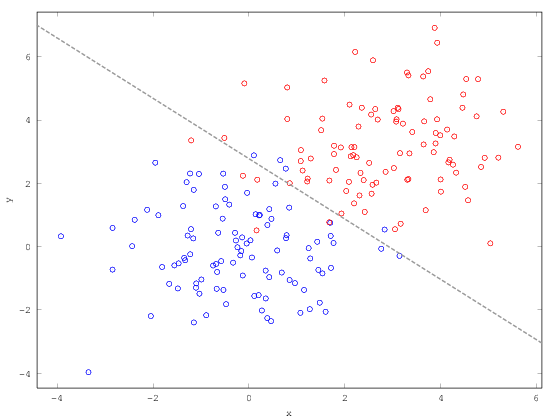

In [47]:
%% PLOT
hold on;
xlabel('x'); ylabel('y');
scatter(D_1(:,1), D_1(:,2), 15, "b");
scatter(D_2(:,1), D_2(:,2), 15, "r");
line([boundary_cen(1) - 10*boundary_dir(1), boundary_cen(1) + 10*boundary_dir(1)],
     [boundary_cen(2) - 10*boundary_dir(2), boundary_cen(2) + 10*boundary_dir(2)],
     "linestyle", "--", "color", [0.6 0.6 0.6], "linewidth", 5);
D = [D_1; D_2]; PAD = 0.5;
axis([min(D(:,1)) - PAD, max(D(:,1)) + PAD, min(D(:,2)) - PAD, max(D(:,2)) + PAD]);